In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
df = pd.read_csv('HepatitisCdata.csv')
print(df)
print(df.head())

     Category   Age  Sex   ALB      ALP     ALT    AST    BIL      CHE  CHOL  \
0         0.0  32.0  NaN  38.5   52.500   7.700  22.10   7.50   6.9300  3.23   
1         0.0  32.0  NaN  38.5   70.300  18.000  24.70   3.90  11.1700  4.80   
2         0.0  32.0  NaN  46.9   74.700  36.200  49.85   6.10   8.8400  5.20   
3         0.0  32.0  NaN  43.2   52.000  30.600  22.60  18.90   7.3300  4.74   
4         0.0  32.0  NaN  39.2   74.100  32.600  24.80   9.60   9.1500  4.32   
..        ...   ...  ...   ...      ...     ...    ...    ...      ...   ...   
610       0.0  62.0  NaN  32.0  118.825   5.900  49.85  20.05   5.5700  6.30   
611       0.0  64.0  NaN  29.2  102.800   2.900  44.40  20.00   2.9525  3.02   
612       0.0  64.0  NaN  29.2   87.300   3.500  49.85  20.05   2.9525  3.63   
613       0.0  46.0  NaN  33.0   66.200  39.000  49.85  20.00   3.5600  4.20   
614       0.0  59.0  NaN  36.0   66.200  58.025  49.85  12.00   9.0700  5.30   

      CREA    GGT  PROT  
0    106.0  1

In [7]:

# Step 2: Drop the unnecessary index column
df.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')

# Step 3: Encode 'Category' into numerical labels for multi-class classification
category_mapping = {
    '0=Blood Donor': 0,
    '0s=suspect Blood Donor': 1,
    '1=Hepatitis': 2,
    '2=Fibrosis': 3,
    '3=Cirrhosis': 4
}
df['Category'] = df['Category'].map(category_mapping)

In [8]:

# Step 4: Encode 'Sex' column (Male = 0, Female = 1)
df['Sex'] = df['Sex'].map({'m': 0, 'f': 1})

# Step 5: Check for missing values
missing_values = df.isnull().sum()

# Step 6: Fill missing values with median (more robust to outliers)
df.fillna(df.median(numeric_only=True), inplace=True)


In [9]:

# Step 7: Check for duplicates and remove them
df.drop_duplicates(inplace=True)

# Step 8: Check for outliers using IQR (Interquartile Range) and replace extreme values
Q1 = df.quantile(0.25, numeric_only=True)
Q3 = df.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 9: Cap outliers at lower and upper bounds
for col in df.select_dtypes(include=[np.number]).columns:
    df[col] = np.where(df[col] < lower_bound[col], lower_bound[col], df[col])
    df[col] = np.where(df[col] > upper_bound[col], upper_bound[col], df[col])

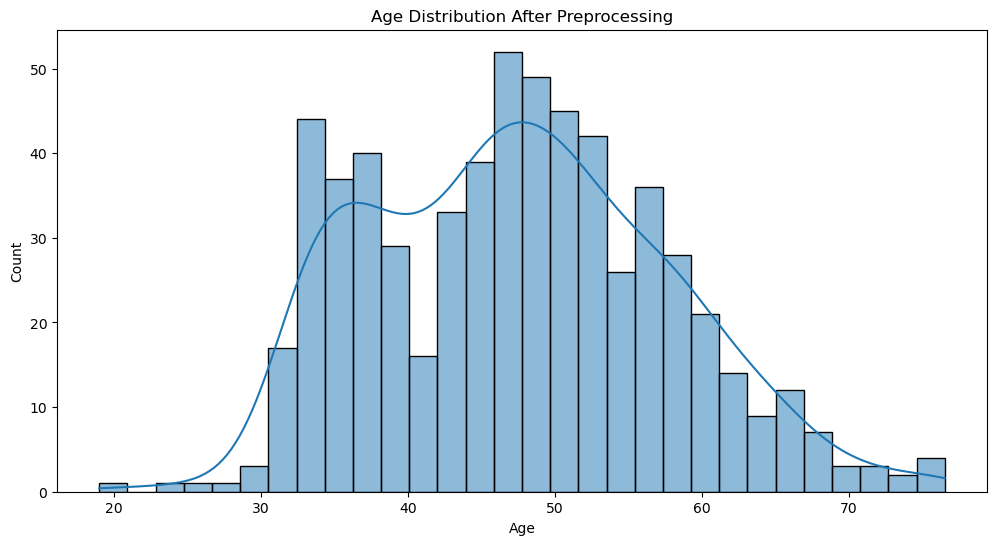

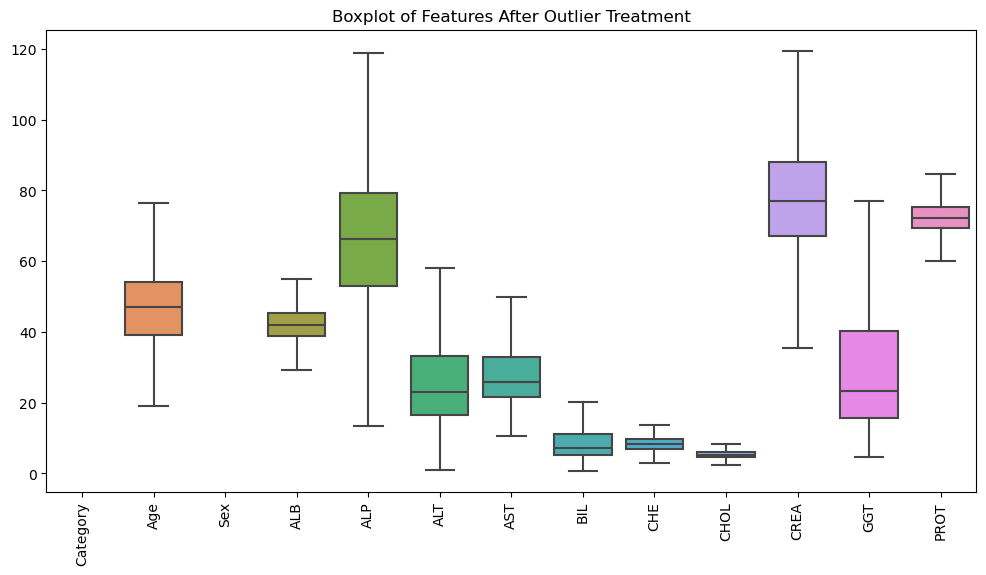

In [10]:

import warnings

# Ignore warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(12, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution After Preprocessing")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=[np.number]))
plt.xticks(rotation=90)
plt.title("Boxplot of Features After Outlier Treatment")
plt.show()

In [11]:
# Step 11: Save the cleaned dataset
df.to_csv("Preprocessed_HepatitisCdata.csv", index=False)

# Step 12: Display summary of preprocessing steps
preprocessed_summary = {
    "Missing Values After Handling": df.isnull().sum().sum(),
    "Duplicates Removed": df.duplicated().sum(),
    "Dataset Shape After Preprocessing": df.shape
}

print("Preprocessing Summary:", preprocessed_summary)


Preprocessing Summary: {'Missing Values After Handling': 1230, 'Duplicates Removed': 0, 'Dataset Shape After Preprocessing': (615, 13)}
